**📊 Analisis Tren Skill & Gaji di Era AI (2023–2025)**

In [3]:
!pip install pandas numpy matplotlib seaborn plotly kaggle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 919.2 kB/s eta 0:00:00


In [5]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print("File yang diupload:", fn)

Saving DataScience_salaries2020_2025.csv to DataScience_salaries2020_2025.csv
File yang diupload: DataScience_salaries2020_2025.csv


In [6]:
# Membaca dataset
df_2020_2025 = pd.read_csv("/content/DataScience_salaries2020_2025.csv")

Dari dataset yang ada, perlu diketahui apakah ada **baris duplikat** dalam data tersebut

In [7]:
print("--- Dataset Awal ---")
initial_rows = df_2020_2025.shape[0]
print(f"Jumlah Baris Awal : {initial_rows}")

duplicates_before = df_2020_2025.duplicated().sum()
print(f"Jumlah Baris Duplikat Terdeteksi : {duplicates_before}")

--- Dataset Awal ---
Jumlah Baris Awal : 93597
Jumlah Baris Duplikat Terdeteksi : 46960


Membersihkan Data

In [8]:
# Hapus baris duplikat
df_2020_2025.drop_duplicates(inplace=True)
print(f"Berhasil menghapus {duplicates_before} baris duplikat")

Berhasil menghapus 46960 baris duplikat


In [9]:
# Validasi tipe data dan nilai
df_2020_2025['work_year'] = df_2020_2025['work_year'].astype(int)
print(f"Tipe data work_year sudah integer")

Tipe data work_year sudah integer


In [10]:
# Memastikan gaji bernilai positif
df_2020_2025 = df_2020_2025[df_2020_2025['salary_in_usd'] > 0]
print(f"Baris gaji < 0 sudah dihapus")

Baris gaji < 0 sudah dihapus


In [11]:
# Standarisasi kolom kategori *job title)
df_2020_2025['job_title'] = df_2020_2025['job_title'].str.strip().str.title()
print(f"Kolom Job Title sudah distandarisasi")

Kolom Job Title sudah distandarisasi


In [12]:
# Memperjelas label level
exp_level_map = {'EN': 'Entry-level', 'MI': 'Mid-level', 'SE': 'Senior-level', 'EX': 'Executive'}
emp_type_map = {'FT': 'Full-time', 'PT': 'Part-time', 'CT': 'Contract', 'FL': 'Freelance'}
comp_size_map = {'S': 'Small', 'M': 'Medium', 'L': 'Large'}

df_2020_2025['experience_level'] = df_2020_2025['experience_level'].map(exp_level_map)
df_2020_2025['employment_type'] = df_2020_2025['employment_type'].map(emp_type_map)
df_2020_2025['company_size'] = df_2020_2025['company_size'].map(comp_size_map)
print(f"Label deskriptif telah ditetapkan")

Label deskriptif telah ditetapkan


Pada sebuah data terdapat **outlier** yang mungkin saja dapat mengganggu hasil analisis yang sebenarnya pada gaji, oleh karena itu perlu diidentifikasi dan dihapus jika perlu

In [13]:
# Identifikasi Outlier
Q1 = df_2020_2025['salary_in_usd'].quantile(0.25)
Q3 = df_2020_2025['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1 #melihat letak data tengah (normal) Interquile Range

lower_bound = Q1 - 1.5 * IQR #(rule of thumb)
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df_2020_2025[df_2020_2025['salary_in_usd'] <= upper_bound]

outliers_mask = (df_2020_2025['salary_in_usd'] < lower_bound) | (df_2020_2025['salary_in_usd'] > upper_bound)
num_outliers = outliers_mask.sum()

Gambaran persebaran outlier gaji pada data awal

/tmp/ipython-input-364346112.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_2020_2025['salary_in_usd'], palette='viridis')


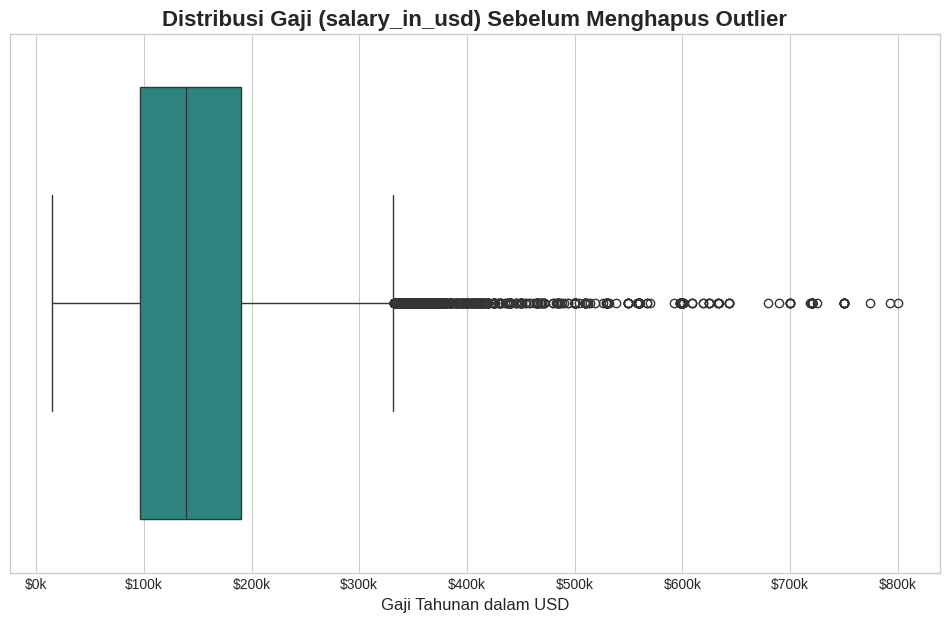

In [14]:
# Membuat aturan untuk visual boxplot
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))

sns.boxplot(x=df_2020_2025['salary_in_usd'], palette='viridis')

plt.title('Distribusi Gaji (salary_in_usd) Sebelum Menghapus Outlier', fontsize=16, fontweight='bold')
plt.xlabel('Gaji Tahunan dalam USD', fontsize=12)
plt.xticks(fontsize=10)

# Format sumbu x agar lebih mudah dibaca
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

plt.show()

✅ Berhasil menghapus 1114 outlier pada data gaji.



/tmp/ipython-input-3605506907.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_2020_2025['salary_in_usd'], palette='viridis')


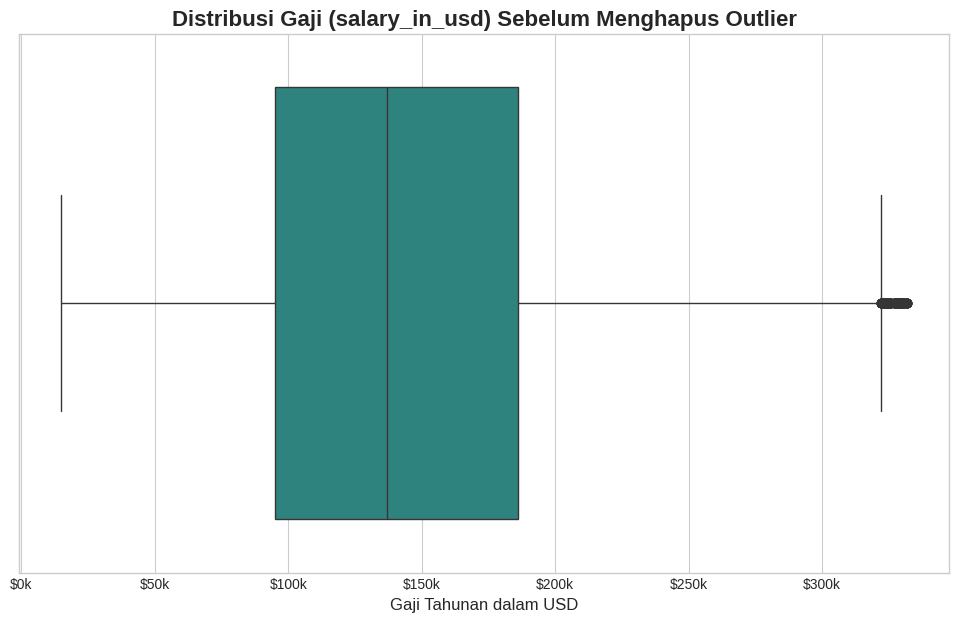

In [15]:
# Menghapus Outlier
df_2020_2025 = df_2020_2025[~outliers_mask]
print(f"✅ Berhasil menghapus {num_outliers} outlier pada data gaji.\n")

# Membuat aturan untuk visual boxplot
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))

sns.boxplot(x=df_2020_2025['salary_in_usd'], palette='viridis')

plt.title('Distribusi Gaji (salary_in_usd) Sebelum Menghapus Outlier', fontsize=16, fontweight='bold')
plt.xlabel('Gaji Tahunan dalam USD', fontsize=12)
plt.xticks(fontsize=10)

# Format sumbu x agar lebih mudah dibaca
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

plt.show()

Hasil Akhir dari data yang telah **dibersihkan**

In [16]:
print("--- Dataset Setelah Dibersihkan ---")
final_rows = df_2020_2025.shape[0]
print(f"Jumlah baris akhir: {final_rows}")
print(f"Total baris yang dihapus: {initial_rows - final_rows}")

print("\nDeskripsi 5 baris pertama dari data yang sudah bersih:")
print(df_2020_2025.head())

--- Dataset Setelah Dibersihkan ---
Jumlah baris akhir: 45523
Total baris yang dihapus: 48074

Deskripsi 5 baris pertama dari data yang sudah bersih:
   work_year experience_level employment_type           job_title  salary  \
0       2025        Mid-level       Full-time  Research Scientist  208000   
1       2025        Mid-level       Full-time  Research Scientist  147000   
2       2025     Senior-level       Full-time  Research Scientist  173000   
3       2025     Senior-level       Full-time  Research Scientist  117000   
4       2025        Mid-level       Full-time         Ai Engineer  100000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         208000                 US             0   
1             USD         147000                 US             0   
2             USD         173000                 US             0   
3             USD         117000                 US             0   
4             USD         100000          

Untuk menganalisis skill yang dibutuhkan, perlu kita untuk **mengerucuti job kategori** untuk tiap job title

In [17]:
# Fungsi untuk mengakategorikan job title
def categorize_job_title_revised(job_title):
    job_title = job_title.lower()

    if 'machine learning' in job_title or 'ml' in job_title or 'ai' in job_title or 'nlp' in job_title:
        return 'Machine Learning / AI'
    elif 'analyst' in job_title or 'analytics' in job_title:
        return 'Data Analysis'
    elif 'engineer' in job_title:
        return 'Data Engineering'
    elif 'scientist' in job_title or 'researcher' in job_title:
        return 'Data Science & Research'
    elif 'manager' in job_title or 'director' in job_title or 'head' in job_title or 'lead' in job_title:
        return 'Management & Leadership'
    elif 'architect' in job_title:
        return 'Data Architecture'
    elif 'business' in job_title or 'intelligence' in job_title:
        return 'Business Intelligence'
    elif 'spoftware developer' in job_title or 'programmer' in job_title:
        return 'Software Development'
    else:
        return 'Other'


In [18]:
# Menerapkan Fungsi
df_cleaned['job_category'] = df_cleaned['job_title'].apply(categorize_job_title_revised)
print(df_cleaned['job_category'].value_counts())

job_category
Data Engineering           14478
Data Analysis               9280
Data Science & Research     6998
Machine Learning / AI       4346
Management & Leadership     4209
Other                       4144
Data Architecture           1485
Business Intelligence        496
Software Development          87
Name: count, dtype: int64


Untuk langkah analisis selanjutnya akan mengambil **Top 5 Job Category** sehingga dapat melihat skill apa yang dubutuhkan untuk Category tersebut

In [19]:
# Menghitung Top 5
top_5_titles = df_cleaned['job_title'].value_counts().head(5)
top_5_categories = df_cleaned['job_category'].value_counts().head(5)

In [20]:
# Menampilkan Top 5
print("\nTop 5 Job Title Paling Dicari (2020-2025)")
print(top_5_titles.to_markdown(headers=["Jabatan","Jumlah"]))

print("\nTop 5 Kategori Pekerjaan Paling Dicari (2020-2025)")
print(top_5_categories.to_markdown(headers=["Kategori","Jumlah"]))


Top 5 Job Title Paling Dicari (2020-2025)
| Jabatan           |   Jumlah |
|:------------------|---------:|
| Data Scientist    |     5312 |
| Data Engineer     |     5078 |
| Data Analyst      |     4554 |
| Software Engineer |     3028 |
| Engineer          |     2597 |

Top 5 Kategori Pekerjaan Paling Dicari (2020-2025)
| Kategori                |   Jumlah |
|:------------------------|---------:|
| Data Engineering        |    14478 |
| Data Analysis           |     9280 |
| Data Science & Research |     6998 |
| Machine Learning / AI   |     4346 |
| Management & Leadership |     4209 |


In [21]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata

# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

# Model setup
model = "ibm-granite/granite-3.2-8b-instruct"
output = Replicate(
  model=model,
  replicate_api_token=api_token,
  streaming=True,
  model_kwargs={"max_new_tokens": 2000}
)

In [22]:
# Define top 5 Job Title paling dicari
top_5_title = [
    "Data Scientist",
    "Data Engineer",
    "Data Analyst",
    "Software Engineer",
    "Engineer"
]

# Penulisan prompt
prompt = f"""
PERAN ANDA:
Anda adalah seorang Analis Karir di bidang Data yang sangat berpengalaman.

KONTEKS:
Saya sedang menganalisis sebuah dataset lowongan pekerjaan dari tahun 2020-2025. Dari analisis tersebut, saya menemukan 5 kategori pekerjaan yang paling banyak dicari. Saya juga sudah membuat ringkasan deskripsi dan skill yang umumnya dibutuhkan untuk setiap kategori tersebut.

Berikut adalah konteksnya:
---
1. Data Engineering:
Deskripsi: Fokus utama adalah membangun dan memelihara infrastruktur data. Mereka memastikan data dapat mengalir dengan lancar, bersih, dan siap digunakan oleh tim lain.
Skill Kunci: SQL (Tingkat Lanjut), Python, Sistem Operasi (Linux), ETL/ELT Tools (Airflow, dbt), Data Warehouse (BigQuery, Snowflake), Teknologi Big Data (Spark, Kafka), Cloud Platforms (AWS, GCP, Azure).

2. Data Analysis:
Deskripsi: Fokus utama adalah menerjemahkan data menjadi wawasan bisnis untuk menjawab pertanyaan tentang apa yang terjadi di masa lalu.
Skill Kunci: SQL (Tingkat Menengah), Spreadsheet (Excel), Python/R (untuk analisis), Business Intelligence Tools (Tableau, Power BI), Statistik Dasar, Komunikasi & Storytelling.

3. Data Science & Research:
Deskripsi: Fokus utama adalah menggunakan metode ilmiah dan statistik untuk membuat prediksi tentang masa depan dan menggali wawasan yang lebih dalam.
Skill Kunci: Python/R (Tingkat Lanjut), SQL, Library Machine Learning (Scikit-learn), Statistik & Probabilitas (Tingkat Lanjut), Desain Eksperimen (A/B Testing), Machine Learning Fundamentals.

4. Machine Learning / AI:
Deskripsi: Fokus utama adalah membangun, melatih, dan menerapkan model AI ke dalam sistem produksi agar bisa berjalan secara otomatis dalam skala besar.
Skill Kunci: Python (Tingkat Ahli), Software Engineering (Git), Framework Deep Learning (TensorFlow, PyTorch), MLOps Tools (MLflow), Cloud AI Services (AWS SageMaker, Vertex AI), Containerization (Docker).

5. Management & Leadership:
Deskripsi: Fokus utama adalah pada strategi, pengelolaan tim, dan memastikan proyek data memberikan nilai bagi bisnis.
Skill Kunci: Pemahaman Arsitektur Sistem, Manajemen Proyek (Agile, Scrum), Komunikasi Stakeholder, Strategi Produk & Bisnis, Mentoring & Pengembangan Tim.
---

TUGAS ANDA:
Berdasarkan konteks yang saya berikan di atas, hasilkan sebuah ringkasan yang jelas dan terstruktur. Untuk setiap **Job Title** yang saya sebutkan di bawah ini, berikan daftar **skill paling penting** yang harus dipersiapkan oleh seseorang. Gabungkan informasi dari deskripsi dan skill kunci yang relevan.

{top_5_titles.to_markdown()}

FORMAT OUTPUT:
Gunakan format berikut untuk setiap job title:

No. [Job Title]
Fokus Utama:[Ringkasan singkat fokus pekerjaan dalam satu kalimat]
Skill Teknis Wajib: [Daftar 3-4 skill teknis paling krusial]
Konsep & Metodologi: [Daftar 1-2 konsep atau metode penting]
Soft Skill Kunci: [Daftar 1-2 soft skill yang paling relevan]

Lalu di akhir penjelasan job title buatkan insight secara garis besar 3 skill dasar yang perlu dipelajari

"""
response = output.invoke(prompt)
print(response)

No. Data Scientist
Fokus Utama: Menggunakan metode ilmiah dan statistik untuk membuat prediksi tentang masa depan dan menggali wawasan yang lebih dalam.
Skill Teknis Wajib:
1. Python/R (Tingkat Lanjut)
2. Library Machine Learning (Scikit-learn)
3. Statistik & Probabilitas (Tingkat Lanjut)
4. Machine Learning Fundamentals

Konsep & Metodologi:
1. Desain Eksperimen (A/B Testing)
2. Data Visualization

Soft Skill Kunci:
1. Komunikasi & Storytelling
2. Mentoring & Pengembangan Tim

Insight: Dari sudut pandang dasar, seseorang yang ingin menjadi Data Scientist harus mempelajari Python/R dengan tingkat lanjut, library machine learning seperti Scikit-learn, dan konsep statistik & probabilitas lanjut.

---

No. Data Engineer
Fokus Utama: Fokus utama adalah membangun dan memelihara infrastruktur data. Mereka memastikan data dapat mengalir dengan lancar, bersih, dan siap digunakan oleh tim lain.
Skill Teknis Wajib:
1. SQL (Tingkat Lanjut)
2. Python
3. Sistem Operasi (Linux)
4. ETL/ELT Tools (Air

In [23]:
prompt_job_titles = f"""
PERAN ANDA:
Anda adalah seorang Analis Data Senior yang ahli dalam menghubungkan tren lowongan kerja dengan rekomendasi karir dan strategi perusahaan.

KONTEKS:
Saya sudah menghitung Top 5 Job Title dari dataset gaji data science & AI tahun 2020–2025.
Hasil perhitungan (Top 5 Job Title) adalah sebagai berikut:

{top_5_titles.to_markdown()}

TUGAS ANDA:
1. Buatlah **Kesimpulan singkat (1 paragraf)** tentang tren pasar kerja berdasarkan Top 5 Job Titles tersebut.
2. Berikan **Rekomendasi konkret**:
   - Untuk mahasiswa atau pemula: skill apa yang paling relevan untuk dipelajari.
   - Untuk perusahaan: strategi apa yang harus diprioritaskan (misalnya training, MLOps, cloud, dll).

Format jawaban HARUS dalam struktur berikut:

Kesimpulan: [isi kesimpulan]

Rekomendasi:
- [rekomendasi mahasiswa/pemula]
- [rekomendasi perusahaan]
"""
response = output.invoke(prompt_job_titles)
print(response)

Kesimpulan:

Dari analisis tersebut, dapat disimpulkan bahwa tren pasar kerja dalam bidang data science & AI tahun 2020-2025 terus mencari tenaga kerja yang qualifikasi tinggi. Job Title "Data Scientist" menjadi posisi teratas dengan jumlah 5312, menunjukkan kebutuhan yang tinggi terhadap ahli yang dapat menginterpreti dan memanfaatkan data kompleks. Job Title kedua, "Data Engineer", mencapai jumlah 5078, menunjukkan kebutuhan untuk orang yang dapat mendesain dan mengelola infrastruktur data. Job Title "Data Analyst" mencapai jumlah 4554, menunjukkan kebutuhan untuk orang yang dapat menganalisis data dan menyediakan informasi yang berguna. Job Title "Software Engineer" dan "Engineer" mencapai jumlah 3028 dan 2597 secara bersamaan, menunjukkan kebutuhan untuk orang yang berpengalaman dalam pengembangan software dan proses umum.

Rekomendasi:

- Mahasiswa/Pemula:
  - Untuk mahasiswa atau pemula yang ingin memasuki bidang data science & AI, skill yang paling relevan untuk dipelajari adala

In [24]:
print("--- Ringkasan Data Siap untuk Model ---")
avg_salary_per_category = df_cleaned.groupby('job_category')['salary_in_usd'].mean().round(0).astype(int).sort_values(ascending=False)
print("\n### DATA 1: Rata-Rata Gaji Tahunan (USD) per Kategori Pekerjaan")
print(avg_salary_per_category.to_markdown(headers=["Kategori", "Rata-Rata Gaji (USD)"]))

top_5_locations = df_cleaned['company_location'].value_counts(normalize=True).head(5) * 100
print("\n## DATA 2: Top 5 Lokasi Pekerjaan (% dari Total Lowongan)")
print(top_5_locations.round(2).to_markdown(headers=["Lokasi", "Persentase (%)"]))

exp_level_dist = df_cleaned['experience_level'].value_counts(normalize=True) * 100
print("\n## DATA 3: Distribusi Level Pengalaman")
print(exp_level_dist.round(2).to_markdown(headers=["Level Pengalaman", "Persentase (%)"]))

summary_data = f"""
{avg_salary_per_category.to_string()}
{top_5_locations.round(2).to_string()}
{exp_level_dist.round(2).to_string()}
"""

--- Ringkasan Data Siap untuk Model ---

### DATA 1: Rata-Rata Gaji Tahunan (USD) per Kategori Pekerjaan
| Kategori                |   Rata-Rata Gaji (USD) |
|:------------------------|-----------------------:|
| Machine Learning / AI   |                 170677 |
| Data Architecture       |                 167137 |
| Management & Leadership |                 157039 |
| Data Engineering        |                 156505 |
| Data Science & Research |                 155037 |
| Software Development    |                 135545 |
| Business Intelligence   |                 124906 |
| Other                   |                 117465 |
| Data Analysis           |                 111724 |

## DATA 2: Top 5 Lokasi Pekerjaan (% dari Total Lowongan)
| Lokasi   |   Persentase (%) |
|:---------|-----------------:|
| US       |            84.49 |
| CA       |             5.75 |
| GB       |             4.04 |
| AU       |             0.61 |
| DE       |             0.53 |

## DATA 3: Distribusi Level 

In [25]:
prompt_lokasi = f"""
PERAN ANDA:
Anda adalah seorang Analis Data Senior yang sangat ahli dalam menerjemahkan data menjadi insight bisnis strategis.

KONTEKS:
Saya telah menganalisis dataset gaji di bidang data dari tahun 2020-2025. Saya sudah melakukan beberapa perhitungan awal dan mendapatkan ringkasan data sebagai berikut:

{summary_data}

TUGAS ANDA:
Berdasarkan ringkasan summary_data, buatlah:
- sebuah analisis tren lokasi singkat dalam gaya formal-eksekutif.
- Jawaban harus ringkas (maksimal 2–3 paragraf per bagian)
- buat berdasarkan hasil pembersihan data serta ringkasan sebelumnya tampa menampilkan summary_data

Analisis Insight Tren Lokasi dengan menjawab Apa arti dominasi Amerika Serikat di pasar kerja data bagi pencari kerja global?
dengan kesimpulan

Jawab ringkas, formal, dan terstruktur.
"""
response = output.invoke(prompt_lokasi)

with open("analysisLocation_output.txt", "w") as f:
    f.write(response)

print(response)

ANALYSIS: Insight on Geographical Trends

INTRODUCTION:

The dataset analysis of the data sector job market from 2020 to 2025 reveals a significant dominance of the United States (US) in terms of employment, accounting for 84.49% of the total. This trend warrants a closer examination to understand its implications for global job seekers in the data field.

ANALYSIS:

1. **Dominant Position of the US**: The US's dominance in the data job market is striking, with a share nearly four times that of the second most represented location, Canada (CA). This dominance can be attributed to several factors. The US is home to numerous tech giants and startups, fostering a robust ecosystem for data-driven innovation. Additionally, its higher education system, particularly in STEM fields, produces a steady stream of skilled professionals.

2. **Global Implications**: For global job seekers, this trend implies that the US remains the most lucrative destination for data-related roles. It offers not on

In [26]:
prompt_gaji = f"""
PERAN ANDA:
Anda adalah seorang Analis Data Senior yang sangat ahli dalam menerjemahkan data menjadi insight bisnis strategis.

KONTEKS:
Saya telah menganalisis dataset di bidang data dari tahun 2020-2025. Saya sudah melakukan beberapa perhitungan awal dan mendapatkan ringkasan data sebagai berikut:

{summary_data}

TUGAS ANDA:
Berdasarkan ringkasan summary_data, buatlah:
- sebuah analisis insight gaji singkat dalam gaya formal-eksekutif.
- Jawaban harus ringkas (maksimal 2–3 paragraf per bagian)
- buat berdasarkan hasil pembersihan data serta ringkasan sebelumnya tampa menampilkan summary_data

Analisis Insight Gaji per kategori yang menjawab pertanyaan:
 Apa kesimpulan utama dari data gaji?
 Kenapa kategori Machine Learning / AI memiliki rata-rata gaji tertinggi?

Format Output:
• Kesimpulan Utama:
• Alasan kategori Machine Learning / AI memiliki rata-rata gaji tertinggi

Jawab ringkas, formal, dan terstruktur.
"""
response = output.invoke(prompt_gaji)

with open("analysisLocation_output.txt", "w") as f:
    f.write(response)

print(response)

• Kesimpulan Utama:

Berdasarkan analisis data dari tahun 2020-2025, kesimpulan utama dari data gaji adalah bahwa kategori Machine Learning / AI menjadi kategori yang memiliki rata-rata gaji tertinggi. Ini dapat dilihat dari angka yang mencapai 170677, yang signifikan lebih tinggi dari kategori terdepan lainnya.

• Alasan kategori Machine Learning / AI memiliki rata-rata gaji tertinggi:

Kategori Machine Learning / AI memiliki rata-rata gaji tertinggi karena beberapa faktor:

1. Demand dan Tren Industri: Dalam era digital tercepat, teknologi Machine Learning dan AI sangat dibutuhkan di berbagai industri. Ketersediaan kurang dari tenaga kerja qualifieded ini membuat posisi ini menjadi sangat ketaratan dan memiliki gaji tinggi.

2. Keterampilan Unik dan Eksotik: Keterampilan dalam Machine Learning dan AI adalah keterampilan yang kompleks dan membutuhkan pengetahuan spesialisasi. Pengembangan algoritma, pembelajaran mesin, dan pemahaman teori komputasi mendasar membutuhkan waktu dan latih

In [27]:
prompt_level = f"""
PERAN ANDA:
Anda adalah seorang Analis Data Senior yang sangat ahli dalam menerjemahkan data menjadi insight bisnis strategis.

KONTEKS:
Saya telah menganalisis dataset di bidang data dari tahun 2020-2025. Saya sudah melakukan beberapa perhitungan awal dan mendapatkan ringkasan data sebagai berikut:

{summary_data}

TUGAS ANDA:
Berdasarkan ringkasan summary_data, buatlah:
- sebuah analisis insight tren level pengalaman singkat dalam gaya formal-eksekutif.
- Analisis menjawab pertanyaan mengapa persentase lowongan untuk level Senior sangat tinggi? Apa artinya ini bagi para pemula (Entry-level)?
- Jawaban harus ringkas (maksimal 2–3 paragraf per bagian)
- buat berdasarkan hasil pembersihan data serta ringkasan sebelumnya tampa menampilkan summary_data

Format Output:
• Kesimpulan Utama:
• Arti bagi para pemula:

Jawab ringkas, formal, dan terstruktur.
"""
response = output.invoke(prompt_level)

with open("analysisLocation_output.txt", "w") as f:
    f.write(response)

print(response)

• Kesimpulan Utama:

Dari analisis data dari tahun 2020-2025, dapat dilihat bahwa perusahaan lebih memiliki kebutuhan terhadap pekerjaan Senior-level (52.87%) dibandingkan dengan Mid-level (32.41%) dan Entry-level (11.78%). Hal ini menunjukkan kebutuhan besar terhadap kemahiran dan pengalaman yang matang di bidang data dan teknologi. Jumlah pekerjaan di kategori Machine Learning / AI (170677) juga menunjukkan ketertarikan yang tinggi terhadap bidang AI dan machine learning, yang sering dianggap sebagai bidang yang kaya dengan potensi tumbuh.

• Arti bagi para pemula (Entry-level):

Persentase tinggi dari pekerjaan Senior-level dalam data ini mungkin menimbulkan pertanyaan tentang peluang kerja bagi pekerja baru atau Entry-level. Walaupun jumlah pekerjaan Entry-level (11.78%) lebih banyak daripada pekerjaan Executive (2.95%), persentasinya masih relatif kecil dibandingkan dengan Senior-level. Ini mungkin menunjukkan beberapa hal:

1. Trend Pengembangan Profesional: Ini mungkin menunjukk

In [28]:
# variabel insight
insight_gaji = output.invoke(prompt_gaji)
insight_lokasi = output.invoke(prompt_gaji)
insight_level = output.invoke(prompt_level)

In [29]:
prompt_ringkasan = f"""
PERAN ANDA:
Anda adalah seorang Analis Data Senior.

KONTEKS:
Saya sudah memiliki hasil analisis sebelumnya:
1. Insight Gaji per Kategori:
{insight_gaji}

2. Tren Lokasi:
{insight_lokasi}

3. Tren Level Pengalaman:
{insight_level}

TUGAS ANDA:
Berdasarkan ketiga insight di atas, rangkai satu Ringkasan Strategis
yang singkat (maksimal 2 paragraf) beserta skill apa yang perlu didalami oleh mahasiswa (contohnya: SQL, excel, Phyton, dll.),
dan memberi saran karir konkret bagi seseorang yang ingin sukses di bidang data saat ini.
"""

ringkasan_strategis = output.invoke(prompt_ringkasan)
print(ringkasan_strategis)

RINGKASAN STRATEGIS:

Profesi Machine Learning / AI menjadi fokus utama dalam bidang data saat ini, terutama karena tingginya gaji dan permintaan yang signifikan. Strategi untuk sukses di bidang ini memerlukan kombinasi kemampuan teknis, pengalaman kerja, dan keterampilan leadership. 

1. Kemampuan Teknis: Mahasiswa harus memperkuat kemampuan mereka dalam bidang teknis yang relevan, seperti algoritma, statistika, dan pemrograman. Kemampuan dalam bahasa pemrograman seperti Python, yang populer dalam Machine Learning, sangat penting. Selain itu, kemampuan dalam manipulasi dan analisis data menggunakan tools seperti SQL dan Excel juga sangat diperlukan.

2. Pengalaman Kerja: Pengalaman kerja, khususnya pada level Senior, sangat dihargai dalam industri ini. Mahasiswa harus berusaha untuk mendapatkan pengalaman kerja praktis melalui internship, proyek skala kecil, atau proyek akhir yang berkaitan dengan Machine Learning / AI.

3. Keterampilan Leadership: Dengan meningkatkan kemampuan leader

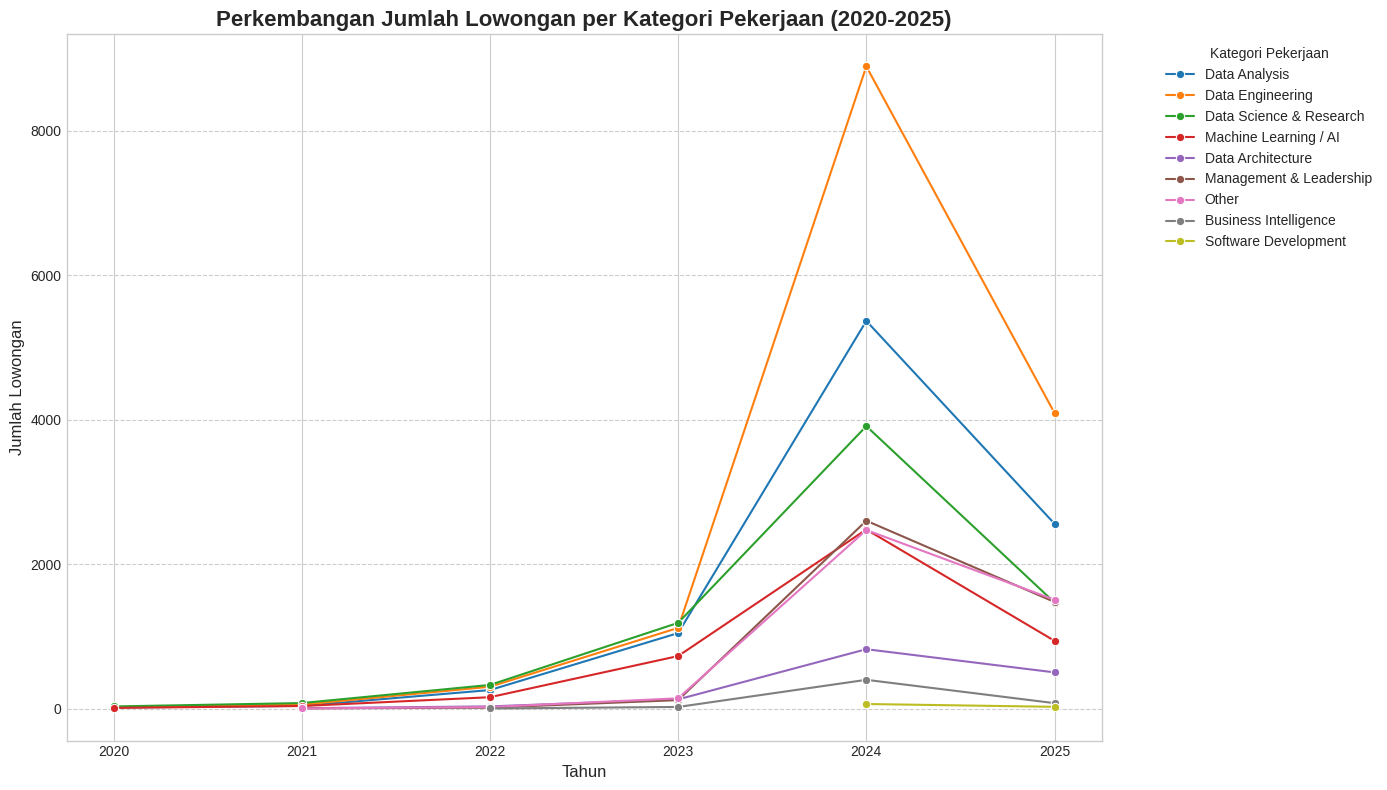

In [30]:
# Group data by year and job category and count the occurrences
job_category = df_cleaned.groupby(['work_year', 'job_category']).size().reset_index(name='count')

# Create a line plot to visualize the trend
plt.figure(figsize=(14, 8))
sns.lineplot(data=job_category, x='work_year', y='count', hue='job_category', marker='o')

plt.title('Perkembangan Jumlah Lowongan per Kategori Pekerjaan (2020-2025)', fontsize=16, fontweight='bold')
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Lowongan', fontsize=12)
plt.xticks(job_category['work_year'].unique()) # Ensure all years are shown on x-axis
plt.grid(axis='y', linestyle='--')
plt.legend(title='Kategori Pekerjaan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()